In [28]:
from langgraph.graph import StateGraph
from typing import Dict,Any,TypedDict
from IPython.display import Image,display

In [39]:
def get_coffee_decoction(state: Dict[str,Any])-> Dict[str,Any]:
    state['coffee_decoction']=f"Get me coffee power from user: {state.get('Coffee_powder',0)}"
    return state

def add_milk(state: Dict[str,Any])-> Dict[str,Any]:
    get_milk=state.get('Milk',0)
    state['Mix_milk']=f' Get Coffee_powder: {coffee_decoction} and Added Milk: {get_milk}'
    return state

def add_hotwater(state: Dict[str,Any])-> Dict[str,Any]:
    get_hotwater=state.get('HotWater',0)
    state['Mix_hotwater']=f' Get Coffee_powder: {coffee_decoction} and Added HotWater {get_hotwater}'
    return state

def check_milk_or_hotwater(state: Dict[str,Any])-> Dict[str,Any]:
    return 'add_hotwater' if state.get('Milk',0) is False else 'add_milk'

def add_whiteSugar(state: Dict[str,Any])->Dict[str,Any]:
    get_whiteSugar=state.get('Sugar',0)
    get_milk_mix=state.get('Mix_milk',0)
    state['Mix_whiteSugar']=f'get mix: {get_milk_mix} and {get_whiteSugar}'
    return state

def add_jira(state: Dict[str,Any])->Dict[str,Any]:
    get_jira=state.get('jira',0)
    get_milk_mix=state.get('Mix_milk',0)
    state['Mix_Jira']=f'get mix: {get_milk_mix} and {get_jira} '
    return state

def check_whiteSugar_Jira(state: Dict[str,Any])->Dict[str,Any]:
    return 'add_whiteSugar' if state.get('jira',0) is False else 'add_jira'

def stir_and_serve(State: Dict[str,Any])->Dict[str,Any]:
    stir=state.get('Jira',0) if state.get('whiteSugar',0) is False else state.get('whiteSugar',0)
    state['Final']=f'Final Serve: {stir}'
    return state

def router_1(state:Dict[str,Any])->Dict[str,Any]:
    return state

def router_2(state:Dict[str,Any])->Dict[str,Any]:
    return state

def router_3(state:Dict[str,Any])->Dict[str,Any]:
    return state


In [40]:
class CoffeMachine(TypedDict):
    Coffee_powder: str #'1 spoon'
    coffee_decoction : str
    Milk:bool # True or False
    Mix_milk: str
    HotWater:bool # True or False
    Mix_hotwater:str
    Sugar: bool # True or False
    Mix_whiteSugar: str
    jira: bool #true or false
    Mix_Jira: str
    Final:str

In [41]:
builder=StateGraph(CoffeMachine)
builder.add_node('get_coffee_decoction',get_coffee_decoction)
builder.add_node('router_1',router_1)
builder.add_node('add_milk',add_milk)
builder.add_node('add_hotwater',add_hotwater)
builder.add_node('router_2',router_2)
builder.add_node('add_whiteSugar',add_whiteSugar)
builder.add_node('add_jira',add_jira)
builder.add_node('router_3',router_3)
builder.add_node('stir_and_serve',stir_and_serve)


In [42]:
builder.set_entry_point('get_coffee_decoction')
builder.add_edge('get_coffee_decoction','router_1')
builder.add_conditional_edges("router_1", check_milk_or_hotwater, 
                            {'add_hotwater':'add_hotwater',
                             'add_milk':'add_milk'})
builder.add_edge('add_hotwater','router_2')
builder.add_edge('add_milk','router_2')
builder.add_conditional_edges("router_2", check_whiteSugar_Jira, 
                            {'add_whiteSugar':'add_whiteSugar',
                             'add_jira':'add_jira'})
builder.add_edge('add_whiteSugar',"router_3")
builder.add_edge('add_jira','router_3')
builder.add_edge('router_3','stir_and_serve')
builder.set_finish_point('stir_and_serve')


In [43]:
graph = builder.compile()

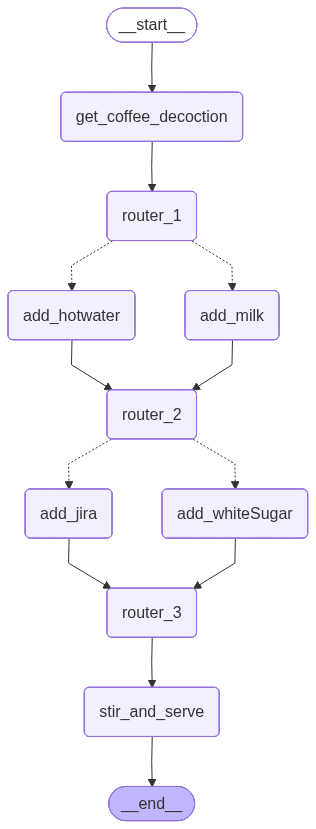

In [44]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
    # Coffee_powder: str #'1 spoon'
    # coffee_decoction : str
    # Milk:bool # True or False
    # Mix_milk: str
    # HotWater:bool # True or False
    # Mix_hotwater:str
    # Sugar: bool # True or False
    # Mix_whiteSugar: str
    # jira: bool #true or false
    # Mix_Jira: str
    # Final:str

initial_state: CoffeMachine = {
    'Coffee_powder': '2 Spoon Coffee Powder',
    'coffee_decoction':'',
    'Milk':True, # True or False
    'Mix_milk':'',
    'HotWater':False, # True or False
    'Mix_hotwater':'',
    'Sugar': True, # True or False
    'Mix_whiteSugar': '',
    'jira': False, #true or false
    'Mix_Jira': '',
    'Final':''
}

# Run the LangGraph
result = graph.invoke(initial_state)

# Print final result
# print("🧃 Final Output:", result["final"])

NameError: name 'coffee_decoction' is not defined